In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### import dataset as dataframe

In [2]:
data_frame = pd.read_excel('data.xlsx', engine='openpyxl') #reads excel dataset
data_frame.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data_frame.shape

(10683, 11)

### While working on large dataset drop missing values first

In [4]:
data_frame.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [5]:
data_frame.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
data_frame.dropna(inplace= True)

In [7]:
data_frame.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
data_frame.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### Change column objects to data time format

In [9]:
def change_object_datetime(df, col):
    df[col] = pd.to_datetime(df[col])

In [10]:
data_frame.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_object_datetime(data_frame, i)

In [12]:
data_frame.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
data_frame.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-07-05 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-05 05:50:00,2021-07-05 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-05 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-07-05 18:05:00,2021-07-05 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-07-05 16:50:00,2021-07-05 21:35:00,4h 45m,1 stop,No info,13302


In [14]:
data_frame['journey_day'] = data_frame['Date_of_Journey'].dt.day
data_frame['journey_month'] = data_frame['Date_of_Journey'].dt.month

In [15]:
data_frame.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-07-05 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-05 05:50:00,2021-07-05 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-05 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-07-05 18:05:00,2021-07-05 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-07-05 16:50:00,2021-07-05 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [16]:
data_frame.drop('Date_of_Journey', axis=1, inplace=True)

In [17]:
data_frame.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-07-05 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-05 05:50:00,2021-07-05 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-05 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-05 18:05:00,2021-07-05 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-05 16:50:00,2021-07-05 21:35:00,4h 45m,1 stop,No info,13302,3,1


### Extract hour and minute from dep_time and arrival_time

In [18]:
def extract_hour(df, col):
    df[col +'_Hour'] = df[col].dt.hour
    
def extract_min(df, col):
    df[col +'_Minute'] = df[col].dt.minute
    


In [19]:
def drop_column(df, col):
    df.drop(col, axis = 1, inplace = True)

In [20]:
extract_hour(data_frame, 'Dep_Time')
extract_hour(data_frame, 'Arrival_Time')

extract_min(data_frame, 'Dep_Time')
extract_min(data_frame, 'Arrival_Time')

In [21]:
data_frame.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_Hour,Arrival_Time_Hour,Dep_Time_Minute,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-07-05 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-05 05:50:00,2021-07-05 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-05 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-05 18:05:00,2021-07-05 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-05 16:50:00,2021-07-05 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,21,50,35


In [22]:
drop_column(data_frame, 'Dep_Time')
drop_column(data_frame, 'Arrival_Time')

In [23]:
data_frame.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_Hour,Arrival_Time_Hour,Dep_Time_Minute,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,21,50,35


In [24]:
duration = list(data_frame['Duration'])

In [25]:
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [26]:
for i in range (len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
            
        else:
            duration[i] = '0h ' + duration[i]
    

In [27]:
data_frame['Duration'] = duration

In [28]:
data_frame.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_Hour,Arrival_Time_Hour,Dep_Time_Minute,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,21,50,35


## Separate hour_minute_from_duration 

In [29]:
def hour(x):
    return x.split(' ')[0][:-1]

def minute(x):
    return x.split(' ')[1][:-1]

In [30]:
data_frame['Duration_hour'] = data_frame['Duration'].apply(hour)
data_frame['Duration_minute'] = data_frame['Duration'].apply(minute)

In [31]:
data_frame.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_Hour,Arrival_Time_Hour,Dep_Time_Minute,Arrival_Time_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,21,50,35,4,45


In [32]:
drop_column(data_frame, 'Duration')

In [33]:
data_frame.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_Hour,Arrival_Time_Hour,Dep_Time_Minute,Arrival_Time_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,21,50,35,4,45


In [34]:
data_frame.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_Hour           int64
Arrival_Time_Hour       int64
Dep_Time_Minute         int64
Arrival_Time_Minute     int64
Duration_hour          object
Duration_minute        object
dtype: object

In [35]:
data_frame['Duration_hour'] = data_frame['Duration_hour'].astype('int64')
data_frame['Duration_minute'] = data_frame['Duration_minute'].astype('int64')

In [36]:
data_frame.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_Hour           int64
Arrival_Time_Hour       int64
Dep_Time_Minute         int64
Arrival_Time_Minute     int64
Duration_hour           int64
Duration_minute         int64
dtype: object

In [37]:
categorical_col = [col for col in data_frame.columns if data_frame[col].dtype == 'O']
categorical_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [38]:
integer_col = [col for col in data_frame.columns if data_frame[col].dtype != 'O']
integer_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_Hour',
 'Arrival_Time_Hour',
 'Dep_Time_Minute',
 'Arrival_Time_Minute',
 'Duration_hour',
 'Duration_minute']

In [39]:
categorical_data = data_frame[categorical_col]
categorical_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [40]:
categorical_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

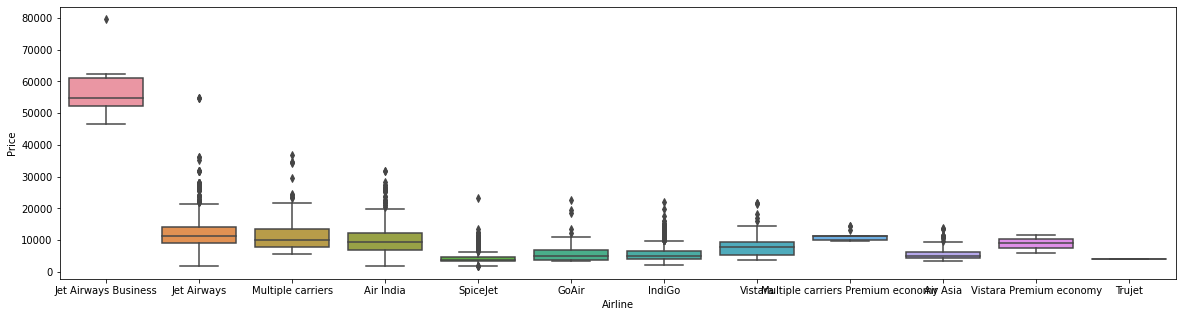

In [41]:
plt.figure(figsize = (20,5))
sns.boxplot(x='Airline', y = 'Price', data = data_frame.sort_values('Price', ascending = False))

### Perform one hot encoding

In [42]:
Airline = pd.get_dummies(categorical_data['Airline'], drop_first = True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [43]:
categorical_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [44]:
Source = pd.get_dummies(categorical_data['Source'], drop_first = True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [45]:
categorical_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [46]:
Destination = pd.get_dummies(categorical_data['Destination'], drop_first = True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [47]:
categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [48]:
categorical_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [49]:
categorical_data['Route_01'] = categorical_data['Route'].str.split('→').str[0]
categorical_data['Route_02'] = categorical_data['Route'].str.split('→').str[1]
categorical_data['Route_03'] = categorical_data['Route'].str.split('→').str[2]
categorical_data['Route_04'] = categorical_data['Route'].str.split('→').str[3]
categorical_data['Route_05'] = categorical_data['Route'].str.split('→').str[4]

<ipython-input-49-2cbdcda2d0f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Route_01'] = categorical_data['Route'].str.split('→').str[0]
<ipython-input-49-2cbdcda2d0f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Route_02'] = categorical_data['Route'].str.split('→').str[1]
<ipython-input-49-2cbdcda2d0f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [50]:
categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [51]:
categorical_data.drop('Route', axis = 1, inplace = True)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [52]:
categorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [53]:
categorical_data.isna().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_01               0
Route_02               0
Route_03            3491
Route_04            9116
Route_05           10636
dtype: int64

In [54]:
for i in ['Route_03', 'Route_04', 'Route_05']:
    categorical_data[i].fillna('None', inplace = True)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [55]:
categorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None,None


In [56]:
for i in categorical_data.columns:
    print('{} has total {} categories'.format(i, len(categorical_data[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_01 has total 5 categories
Route_02 has total 45 categories
Route_03 has total 30 categories
Route_04 has total 14 categories
Route_05 has total 6 categories


In [57]:
categorical_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_01', 'Route_02', 'Route_03', 'Route_04', 'Route_05'],
      dtype='object')

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
encoder = LabelEncoder()

In [60]:
for i in ['Route_01','Route_02','Route_03', 'Route_04', 'Route_05']:
    categorical_data[i] = encoder.fit_transform(categorical_data[i])

<ipython-input-60-cb21cc1077fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[i] = encoder.fit_transform(categorical_data[i])


In [61]:
categorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [62]:
categorical_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [63]:
dict_stop = {'non-stop' : 0,
            '1 stop': 1,
            '2 stops': 2,
            '3 stops': 3,
            '4 stops': 4,
            }

In [64]:
dict_stop

{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}

In [65]:
categorical_data['Total_Stops'] = categorical_data['Total_Stops'].map(dict_stop)

<ipython-input-65-94577825af4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Total_Stops'] = categorical_data['Total_Stops'].map(dict_stop)


In [66]:
categorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,No info,0,34,8,13,5


In [67]:
categorical_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [68]:
categorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,No info,0,34,8,13,5


In [69]:
data_frame = pd.concat([categorical_data, Airline, Source, Destination, data_frame[integer_col]], axis = 1)

In [70]:
data_frame.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05,...,New Delhi,Price,journey_day,journey_month,Dep_Time_Hour,Arrival_Time_Hour,Dep_Time_Minute,Arrival_Time_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5,...,1,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5,...,0,7662,5,1,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5,...,0,13882,6,9,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5,...,0,6218,5,12,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,0,34,8,13,5,...,1,13302,3,1,16,21,50,35,4,45


In [71]:
pd.set_option('display.max_columns', 48)

In [72]:
data_frame.drop('Additional_Info',axis=1,inplace = True)

In [73]:
data_frame.head()

,Airline,Source,Destination,Total_Stops,Route_01,Route_02,Route_03,Route_04,Route_05,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_Hour,Arrival_Time_Hour,Dep_Time_Minute,Arrival_Time_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,21,50,35,4,45


In [74]:
data_frame.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)

In [75]:
data_frame.head()

,Total_Stops,Route_01,Route_02,Route_03,Route_04,Route_05,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_Hour,Arrival_Time_Hour,Dep_Time_Minute,Arrival_Time_Minute,Duration_hour,Duration_minute
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,1,20,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,13,50,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,4,25,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,23,5,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,21,50,35,4,45


### Outlier Detection

In [76]:
# def plot(df, col):
#     fig,(ax1, ax2) = plt.subplot(2, 1)
#     sns.displot()

In [77]:
def plot(df, col):
    fig,(ax1, ax2) = plt.subplots(2, 1)
    sns.displot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


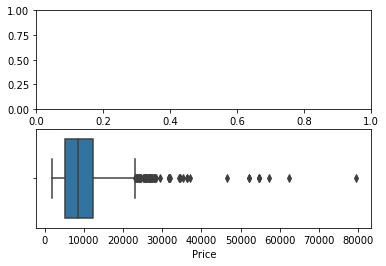

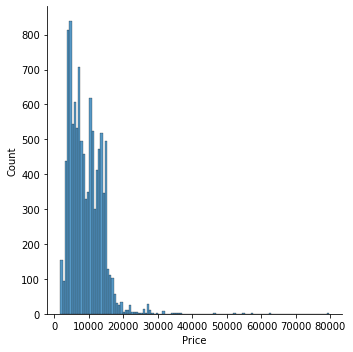

In [78]:
plot(data_frame, 'Price')

In [79]:
data_frame['Price'] = np.where(data_frame['Price'] >= 40000, data_frame['Price'].median(), data_frame['Price'])

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


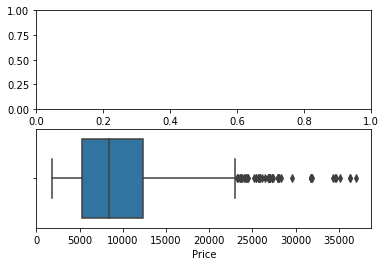

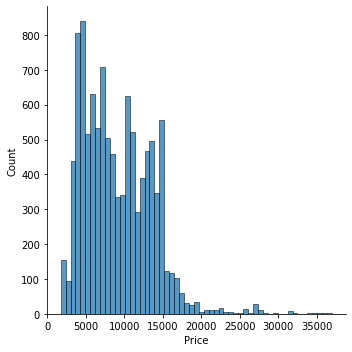

In [80]:
plot(data_frame, 'Price')

### Separate independent and Dependent variables

In [81]:
X_data = data_frame.drop('Price', axis = 1)
X_data.head() 

,Total_Stops,Route_01,Route_02,Route_03,Route_04,Route_05,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_day,journey_month,Dep_Time_Hour,Arrival_Time_Hour,Dep_Time_Minute,Arrival_Time_Minute,Duration_hour,Duration_minute
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,1,20,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,13,50,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,4,25,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,23,5,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,21,50,35,4,45


In [82]:
y_data = data_frame['Price']
y_data.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

### Apply feature selection technique

In [83]:
from sklearn.feature_selection import mutual_info_classif

In [84]:
my_data = mutual_info_classif(X_data, y_data)

In [85]:
imp = pd.DataFrame(my_data, index = X_data.columns)
imp 

,0
Total_Stops,2.141163
Route_01,2.056931
Route_02,2.837608
Route_03,2.323608
Route_04,1.410089
Route_05,0.705531
Air India,0.752724
GoAir,0.086641
IndiGo,0.678521
Jet Airways,0.945180


In [86]:
imp.columns = ['Important Rank']
imp

,Important Rank
Total_Stops,2.141163
Route_01,2.056931
Route_02,2.837608
Route_03,2.323608
Route_04,1.410089
Route_05,0.705531
Air India,0.752724
GoAir,0.086641
IndiGo,0.678521
Jet Airways,0.945180
